<a href="https://colab.research.google.com/github/Sofarevak/sortify/blob/code/Sortclassfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install kaggle
!pip install kaggle --quiet

In [ ]:
#  Upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sofapro666","key":"4fa00f0ce1e26c2e0981c287f018103d"}'}

In [ ]:
# Settings API kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset
!kaggle datasets download -d zlatan599/garbage-dataset-classification

Dataset URL: https://www.kaggle.com/datasets/zlatan599/garbage-dataset-classification
License(s): MIT
 71% 86.0M/121M [00:00<00:00, 841MB/s]
100% 121M/121M [00:00<00:00, 782MB/s] 


In [ ]:
# Unzip dataset
!unzip garbage-dataset-classification.zip -d garbage-dataset

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: garbage-dataset/Garbage_Dataset_Classification/images/paper/paper_03049.jpg  
  inflating: garbage-dataset/Garbage_Dataset_Classification/images/paper/paper_03050.jpg  
  inflating: garbage-dataset/Garbage_Dataset_Classification/images/paper/paper_03052.jpg  
  inflating: garbage-dataset/Garbage_Dataset_Classification/images/paper/paper_03053.jpg  
  inflating: garbage-dataset/Garbage_Dataset_Classification/images/paper/paper_03054.jpg  
  inflating: garbage-dataset/Garbage_Dataset_Classification/images/paper/paper_03055.jpg  
  inflating: garbage-dataset/Garbage_Dataset_Classification/images/paper/paper_03056.jpg  
  inflating: garbage-dataset/Garbage_Dataset_Classification/images/paper/paper_03057.jpg  
  inflating: garbage-dataset/Garbage_Dataset_Classification/images/paper/paper_03058.jpg  
  inflating: garbage-dataset/Garbage_Dataset_Classification/images/paper/paper_03061.jpg  
  inflating: garbage-d

In [ ]:
import pandas as pd

# Find the path to the metadata.csv file
metadata_path = 'garbage-dataset/Garbage_Dataset_Classification/metadata.csv'
metadata_df = pd.read_csv("garbage-dataset/Garbage_Dataset_Classification/metadata.csv")

metadata_df.head()
print(f"\n Size of metadata_df: {len(metadata_df)}")


 Size of metadata_df: 13901


In [ ]:
#4
from PIL import Image
import os

# Let's find the directores for images
image_dir = 'garbage-dataset/Garbage_Dataset_Classification/images'

# Create broken_images list
broken_images = []

# Walk through all subdirectories in the image directory
for subdir, dirs, files in os.walk(image_dir):
    for file in files:
        filepath = os.path.join(subdir, file)
        try:
            img = Image.open(filepath)
            img.verify() # Verify the image integrity
        except (IOError, SyntaxError) as e:
            print(f"Broken image identified: {filepath}, error: {e}")
            broken_images.append(filepath)

print(f"\nFound {len(broken_images)} broken images.")


Found 0 broken images.


In [ ]:
import hashlib
from PIL import Image
import os

image_dir = 'garbage-dataset/Garbage_Dataset_Classification/images'
image_hashes = {}
duplicate_images = []

# Walk through all subdirectories in the image directory
for subdir, dirs, files in os.walk(image_dir):
    for file in files:
        filepath = os.path.join(subdir, file)
        if filepath in broken_images:
            continue # Skip broken images
        try:
            img = Image.open(filepath).convert('RGB') # Convert to RGB to ensure consistent hashing
            img_hash = hashlib.md5(img.tobytes()).hexdigest()

            if img_hash in image_hashes:
                print(f"Duplicate image identified: {filepath} (duplicate of {image_hashes[img_hash]})")
                duplicate_images.append(filepath)
            else:
                image_hashes[img_hash] = filepath

        except Exception as e:
            print(f"Error processing image {filepath} for hashing: {e}")

print(f"\nFound {len(duplicate_images)} duplicate images.")

Duplicate image identified: garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_01023.jpg (duplicate of garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_02740.jpg)
Duplicate image identified: garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_00978.jpg (duplicate of garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_02672.jpg)
Duplicate image identified: garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_02399.jpg (duplicate of garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_01021.jpg)
Duplicate image identified: garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_00125.jpg (duplicate of garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_02178.jpg)
Duplicate image identified: garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_02673.jpg (duplicate of garbage-dataset/Garbage_Dataset_Classification/images/plastic/plas

In [ ]:
import os

# Combine the lists of broken and duplicate images
images_to_delete = broken_images + duplicate_images

print(f"Deleting {len(images_to_delete)} images...")

for filepath in images_to_delete:
    try:
        # Ensure the full path is used for deletion
        full_filepath = os.path.join('garbage-dataset/Garbage_Dataset_Classification/images', filepath)
        os.remove(full_filepath)
        print(f"Deleted: {full_filepath}")
    except OSError as e:
        print(f"Error deleting {full_filepath}: {e}")

print("Deletion complete.")

Deleting 2244 images...
Error deleting garbage-dataset/Garbage_Dataset_Classification/images/garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_01023.jpg: [Errno 2] No such file or directory: 'garbage-dataset/Garbage_Dataset_Classification/images/garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_01023.jpg'
Error deleting garbage-dataset/Garbage_Dataset_Classification/images/garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_00978.jpg: [Errno 2] No such file or directory: 'garbage-dataset/Garbage_Dataset_Classification/images/garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_00978.jpg'
Error deleting garbage-dataset/Garbage_Dataset_Classification/images/garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_02399.jpg: [Errno 2] No such file or directory: 'garbage-dataset/Garbage_Dataset_Classification/images/garbage-dataset/Garbage_Dataset_Classification/images/plastic/plastic_02399.jpg'
Error d

In [ ]:
# Update metadata_df to exclude the deleted images
# Create a set of just the filenames of images to delete for efficient lookup
images_to_delete_filenames = set(os.path.basename(filename) for filename in (broken_images + duplicate_images))

metadata_df = metadata_df[~metadata_df['filename'].isin(images_to_delete_filenames)]

display(metadata_df.head())
print(f"\nNew size of metadata_df: {len(metadata_df)}")

,filename,label
2,cardboard_01728.jpg,cardboard
3,cardboard_00093.jpg,cardboard
4,cardboard_00094.jpg,cardboard
5,cardboard_01100.jpg,cardboard
6,cardboard_02174.jpg,cardboard



New size of metadata_df: 11657


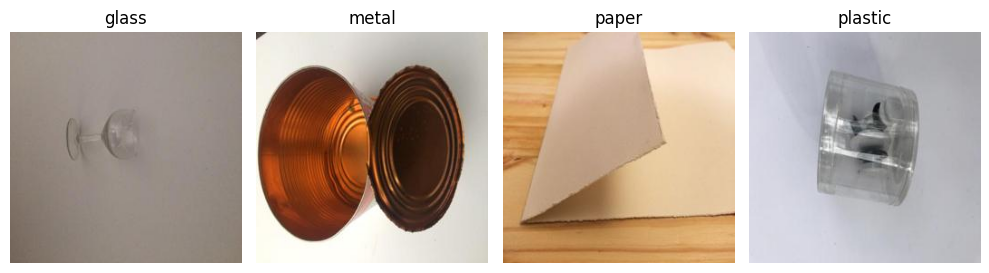

In [ ]:
# Image visualization
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

class_to_path = {
    "glass": "garbage-dataset/Garbage_Dataset_Classification/images/glass/",
    "metal": "garbage-dataset/Garbage_Dataset_Classification/images/metal/",
    "paper": "garbage-dataset/Garbage_Dataset_Classification/images/paper/",
    "plastic": "garbage-dataset/Garbage_Dataset_Classification/images/plastic/"
}

classes = ["glass", "metal", "paper", "plastic"]

fig, axs = plt.subplots(1, 4, figsize=(10, 3))

for i, label in enumerate(classes):

    class_df = metadata_df[metadata_df['label'] == label].copy()

    img_folder = class_to_path[label]

    class_df['full_path'] = class_df['filename'].apply(lambda x: os.path.join(img_folder, x))

    # Select a random image instead of a fixed index
    if not class_df.empty:
        img_path = random.choice(class_df['full_path'].tolist())
        try:
            img = Image.open(img_path)
            axs[i].imshow(img)
            axs[i].set_title(label)
            axs[i].axis('off')
        except FileNotFoundError:
            print(f"Image not found: {img_path}")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    else:
        print(f"No images found for class: {label}")


plt.tight_layout()
plt.show()

In [ ]:
# Splitting into train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(
    metadata_df,
    test_size=0.25,
    stratify=metadata_df['label'],
    random_state=42
)

print("Размер обучающей выборки:", len(train_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 8742
Размер тестовой выборки: 2915


In [ ]:
#1
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained MobileNetV2 model, excluding the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model so they are not trained
base_model.trainable = False

# Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Add a dense layer
predictions = Dense(len(classes), activation='softmax')(x) # Add a prediction layer

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,573,828 (13.63 MB)

 Trainable params: 1,315,844 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
#2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_height, img_width = 224, 224

# Update filenames in train_df and test_df to include the class subdirectory
train_df['filename'] = train_df.apply(lambda row: os.path.join(row['label'], row['filename']), axis=1)
test_df['filename'] = test_df.apply(lambda row: os.path.join(row['label'], row['filename']), axis=1)


# Create an ImageDataGenerator for training (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create an ImageDataGenerator for testing (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    train_df, # Use the updated train_df
    directory='garbage-dataset/Garbage_Dataset_Classification/images',
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=classes
)

test_generator = test_datagen.flow_from_dataframe(
    test_df, # Use the updated test_df
    directory='garbage-dataset/Garbage_Dataset_Classification/images',
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=classes,
    shuffle=False
)

Found 5579 validated image filenames belonging to 4 classes.
Found 1860 validated image filenames belonging to 4 classes.


In [ ]:
# Unfreeze some layers of the base model for fine-tuning
# It's common to unfreeze layers from later blocks
# Let's unfreeze the last few layers
for layer in base_model.layers[-30:]: # Unfreeze the last 30 layers as an example
   layer.trainable = True

# Recompile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), # Use a lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,573,828 (13.63 MB)

 Trainable params: 2,842,244 (10.84 MB)

 Non-trainable params: 731,584 (2.79 MB)

In [ ]:
# Continue training the model with fine-tuning
epochs_fine_tune = 3 # Number of additional epochs for fine-tuning

history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs + epochs_fine_tune, # Train for total epochs (initial + fine-tuning)
    initial_epoch=epochs, # Start from the epoch where initial training ended
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 6/8
174/174 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - accuracy: 0.9068 - loss: 0.2543 - val_accuracy: 0.8912 - val_loss: 0.6632
Epoch 7/8
174/174 ━━━━━━━━━━━━━━━━━━━━ 82s 466ms/step - accuracy: 0.9062 - loss: 0.2800 - val_accuracy: 0.8906 - val_loss: 0.6612
Epoch 8/8
174/174 ━━━━━━━━━━━━━━━━━━━━ 464s 3s/step - accuracy: 0.9191 - loss: 0.2351 - val_accuracy: 0.8788 - val_loss: 0.8685


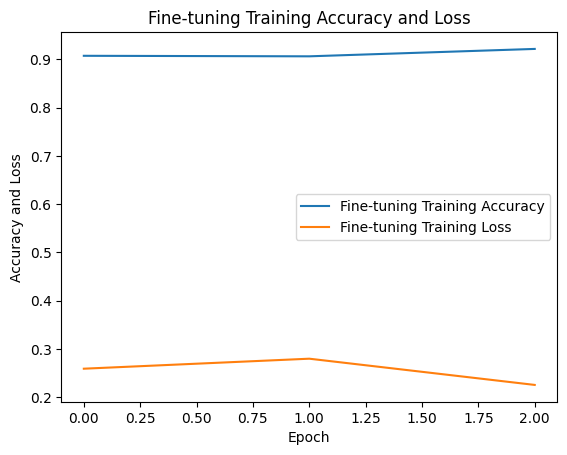

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy for fine-tuning
plt.plot(history_fine_tune.history['accuracy'], label='Fine-tuning Training Accuracy')
plt.plot(history_fine_tune.history['loss'], label='Fine-tuning Training Loss')
plt.title('Fine-tuning Training Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend()
plt.show()

In [ ]:
# Check training accuracy after fine-tuning
print("Final Training Accuracy after fine-tuning:", history_fine_tune.history['accuracy'][-1])
print("Final Validation Accuracy after fine-tuning:", history_fine_tune.history['val_accuracy'][-1])

Final Training Accuracy after fine-tuning: 0.9215792417526245
Final Validation Accuracy after fine-tuning: 0.8787715435028076


In [ ]:
#3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Add a dense layer
predictions = Dense(len(classes), activation='softmax')(x) # Add a prediction layer

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,573,828 (13.63 MB)

 Trainable params: 1,315,844 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 5 epochs
epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.7370 - loss: 0.6864 - val_accuracy: 0.8755 - val_loss: 0.3438
Epoch 2/5
  1/174 ━━━━━━━━━━━━━━━━━━━━ 3:29 1s/step - accuracy: 0.8438 - loss: 0.4173

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


174/174 ━━━━━━━━━━━━━━━━━━━━ 77s 439ms/step - accuracy: 0.8438 - loss: 0.4173 - val_accuracy: 0.8728 - val_loss: 0.3475
Epoch 3/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.8833 - loss: 0.3138 - val_accuracy: 0.9009 - val_loss: 0.2792
Epoch 4/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 77s 437ms/step - accuracy: 0.9375 - loss: 0.1647 - val_accuracy: 0.8879 - val_loss: 0.3086
Epoch 5/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 370s 2s/step - accuracy: 0.8980 - loss: 0.2815 - val_accuracy: 0.8728 - val_loss: 0.3336


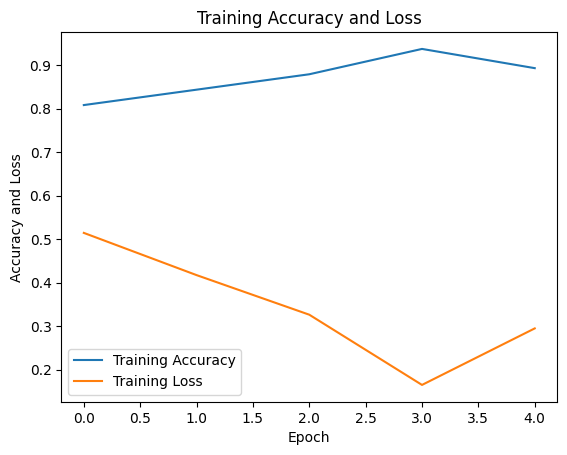

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend()
plt.show()

In [ ]:
#7
from sklearn.metrics import classification_report
import numpy as np # Import numpy

# Get predictions from the test generator
test_generator.reset() # Reset the generator before predicting
# Calculate steps to include all samples
steps = int(np.ceil(test_generator.samples / batch_size))
predictions = model.predict(test_generator, steps=steps)
predicted_classes = tf.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

59/59 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step
              precision    recall  f1-score   support

       glass       0.96      0.85      0.90       573
       metal       0.86      0.84      0.85       407
       paper       0.86      0.97      0.91       452
     plastic       0.83      0.85      0.84       428

    accuracy                           0.88      1860
   macro avg       0.88      0.88      0.88      1860
weighted avg       0.88      0.88      0.88      1860



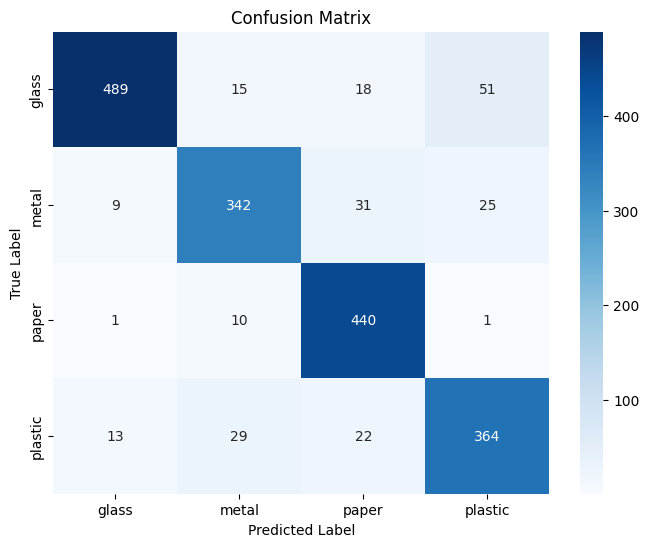

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# # Save the trained model
# model.save('garbage_classification_model.h5')
# print("Model saved successfully!")